![](info/SchoolOfAI_MTY_Logo2.png)

# What happens when the problem is not Linear? 

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import widgets, Layout
from IPython.display import display, clear_output, HTML, Image

In [2]:
#Create a linear and random distrution as the X-feature
x = 1.5 + 2.5 * np.random.randn(100)
#Create a component of error for the output Y
res =  0 + 0.8 * np.random.randn(100)
#Create the output with a quadratic distribution
y_act = 5 + 0.3 * np.square(x) + res

In [3]:
#Create the linear model
model = LinearRegression()

In [4]:
#Adjust the model to our values and predict the output
model.fit(x.reshape(-1,1),y_act)
y_pred = model.predict(x.reshape(-1,1))

In [5]:
#Create a model with a transformed input 
x2 = x**2
y_pred2 = model.predict(x2.reshape(-1,1)) 

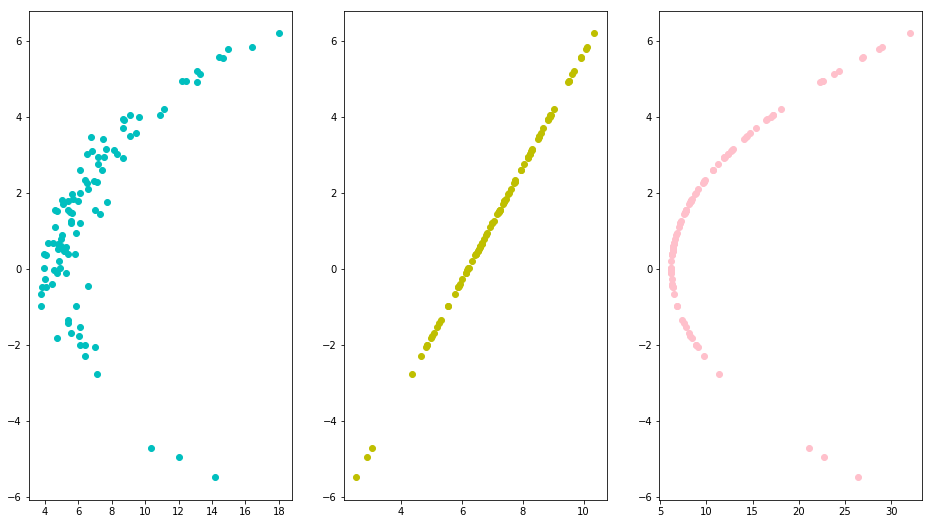

In [6]:
plt.subplots(1,3, figsize = (16,9),)

plt.subplot(1,3,1)
plt.scatter(y_act,x, c = 'c')
plt.subplot(1,3,2)
plt.scatter(y_pred,x, c = 'y')
plt.subplot(1,3,3)
plt.scatter(y_pred2,x, c = 'pink')

# Neural Networks

### Import libraries

In [7]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [31]:
train = pd.read_csv('home_data.csv', header = 0)

In [32]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Normalizing the dataset

There are different types of normalizations in statistics, we would be using the Min-Max Feature scaling that is used to bring all values into the range [0,1]. This is also called unity-based normalization. 
See: https://en.wikipedia.org/wiki/Normalization_(statistics) to check others normalization types

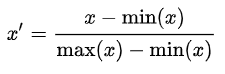

In [10]:
df = train[['sqft_living', 'grade', 'sqft_above','price']]
df_norm = (df-df.min())/(df.max()-df.min())

In [11]:
df_norm.head()

,sqft_living,grade,sqft_above,price
0,0.067170,0.500000,0.097588,0.019266
1,0.172075,0.500000,0.206140,0.060721
2,0.036226,0.416667,0.052632,0.013770
3,0.126038,0.500000,0.083333,0.069377
4,0.104906,0.583333,0.152412,0.057049


## Weaving the net

### What is a Neural Network?

Artificial neural networks (ANN) are computing systems that are inspired by, but not necessarily identical to, the biological neural networks that constitute animal brains. Such systems "learn" to perform tasks by considering examples, generally without being programmed with any task-specific rules. 

An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal from one artificial neuron to another. An artificial neuron that receives a signal can process it and then signal additional artificial neurons connected to it.

In common ANN implementations, the signal at a connection between artificial neurons is a real number, and the output of each artificial neuron is computed by some non-linear function of the sum of its inputs.

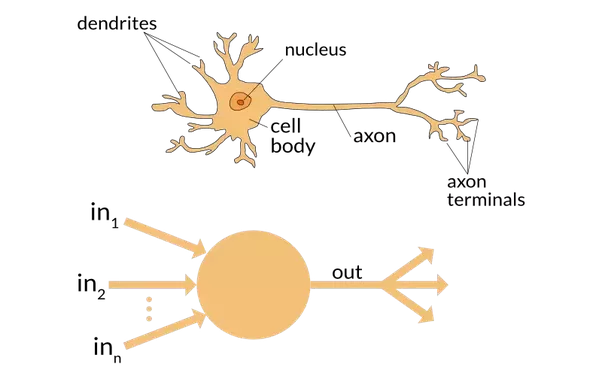

### Neural Network Parts

Neural Networks consist of the following components:

- An input layer, x
- An arbitrary amount of hidden layers
- An output layer, ŷ
- A set of weights and biases between each layer, W and b
- A choice of activation function for each hidden layer, σ.

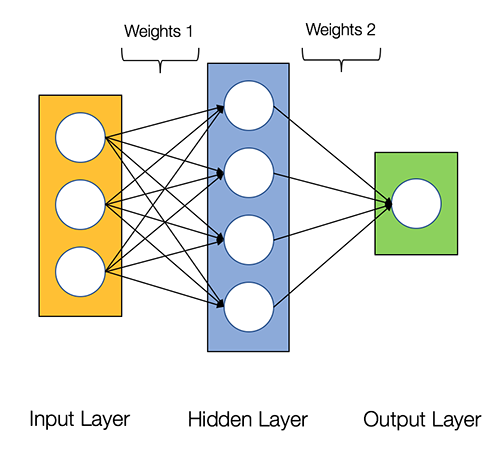

The output ŷ of a simple 2-layer Neural Network (hidden + output) is:
The weights W and the biases b are the only variables that affects the output ŷ.
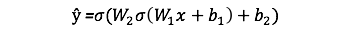
The process of fine-tuning the weights and biases from the input data is known as training the Neural Network.

In [12]:
def initialize_parameters(n_x, n_h, n_y):
    #Initialize weights with a random value depending on the neurons on the input layer and the hidden one
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))

    parameters = {
    "W1": W1,
    "b1" : b1,
    "W2": W2,
    "b2" : b2
    }
    return parameters

### Activation Function

In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs. 

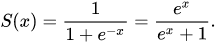

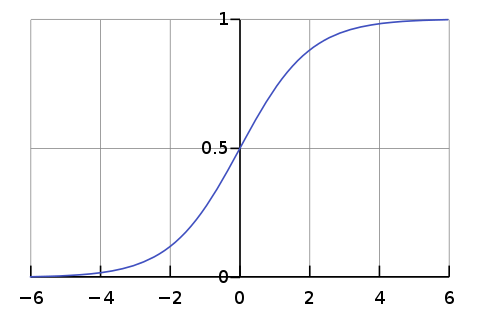

In [13]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

### Feedfordward & Back Propagation

- Calculating the predicted output ŷ, known as feedforward
- Updating the weights and biases, known as backpropagation

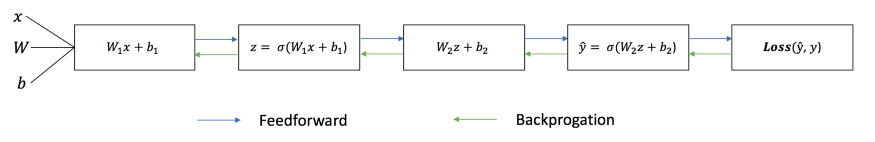

In [14]:
def forward_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #Multiply the input X and the Weights
    Z1 = np.dot(W1, X) + b1
    #Apply the activation function
    A1 = np.tanh(Z1)
    #The output of the last layer is multiplied with the weights of the second layer
    Z2 = np.dot(W2, A1) + b2
    #Apply the second activation function
    A2 = sigmoid(Z2)

    cache = {
    "A1": A1,
    "A2": A2
    }
    return A2, cache

### Loss Function or Cost Function

it’s a method of evaluating how well your algorithm models your dataset.
$$MSE =  \frac{1}{n} \sum_{i=1}^{n} (Y_{(i)} - Y'_{(i)})^2$$

In [15]:
def calculate_cost(A2, Y, X):
    #cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2)))/m
    #cost = metrics.mean_squared_error(Y,A2)
    cost = (1/m) * (np.sum(np.square(Y - A2)))
    return cost

Once we know the Error of the whole system we need to propagate the error back and update the weights and bias. 
To do this we need to know the derivative of the loss function with respect to the weights and biases.

![GDUrl](https://media.giphy.com/media/O9rcZVmRcEGqI/giphy.gif "GD")
<br>
This is known as gradient descent.

For more information see: 
- Dot csv (spanish):
- https://www.youtube.com/watch?v=A6FiCDoz8_4 
- Siraj Raval:
- https://www.youtube.com/watch?v=FaHHWdsIYQg
- Math video:
- https://www.youtube.com/watch?v=tIeHLnjs5U8 
- Math docs:
- https://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html
- https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [16]:
def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m
    
    # update the weights with the derivative (slope) of the loss function
    grads = {
    "dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2
    }
    
    return grads

In [17]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    new_parameters = {
    "W1": W1,
    "W2": W2,
    "b1" : b1,
    "b2" : b2
    }
    
    return new_parameters

### Putting all together 

In [18]:
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_of_iters+1):
        
        #Get the prediction     
        a2, cache = forward_prop(X, parameters)
        #Get the cost based on the prediction and the actual value
        cost = calculate_cost(a2, Y, X)
        #Get the gradients
        grads = backward_prop(X, Y, cache, parameters)
        #update weights and bias 
        parameters = update_parameters(parameters, grads, learning_rate)
        #print the cost every 200 epochs
        if(i%200 == 0):
            print('Cost after iteration# {:d}: {:f}'.format(i, cost))
            
    return parameters

In [19]:
def predict(X, parameters):
    #The prediction is the output of the fordward propagation with the updated parameters
    a2, cache = forward_prop(X, parameters)
    yhat = a2
    yhat = np.squeeze(yhat)
    
    #If your output is binary, used the following:
    
   # if(yhat >= 0.5):
    #    y_predict = 1
    #else:
     #   y_predict = 0

    return yhat

In [20]:
#Set a seed o always get the same random values
np.random.seed(2)
#Get out features
X = df_norm[['sqft_living', 'grade', 'sqft_above']]
Y = df_norm["price"]

X = np.array(X).T

Y = np.array(Y).reshape(1,21613)

# No. of training examples
m = X.shape[1]
# Set the hyperparameters
n_x = 3     #No. of neurons in first layer
n_h = 8     #No. of neurons in hidden layer
n_y = 1     #No. of neurons in output layer
num_of_iters = 5000 #Epochs
learning_rate = 0.1 #Learning rate for gradient descent

In [21]:
trained_parameters = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)

Cost after iteration# 0: 0.391128
Cost after iteration# 200: 0.002272
Cost after iteration# 400: 0.001947
Cost after iteration# 600: 0.001706
Cost after iteration# 800: 0.001526
Cost after iteration# 1000: 0.001394
Cost after iteration# 1200: 0.001298
Cost after iteration# 1400: 0.001229
Cost after iteration# 1600: 0.001182
Cost after iteration# 1800: 0.001148
Cost after iteration# 2000: 0.001125
Cost after iteration# 2200: 0.001109
Cost after iteration# 2400: 0.001097
Cost after iteration# 2600: 0.001089
Cost after iteration# 2800: 0.001082
Cost after iteration# 3000: 0.001077
Cost after iteration# 3200: 0.001072
Cost after iteration# 3400: 0.001069
Cost after iteration# 3600: 0.001066
Cost after iteration# 3800: 0.001063
Cost after iteration# 4000: 0.001060
Cost after iteration# 4200: 0.001057
Cost after iteration# 4400: 0.001055
Cost after iteration# 4600: 0.001052
Cost after iteration# 4800: 0.001050
Cost after iteration# 5000: 0.001048


In [22]:
test = df_norm[["sqft_living", "grade", "sqft_above"]]
test = np.array(test)
test = test.T

In [23]:
y_predict = predict(test, trained_parameters)

In [24]:
df_norm["pred"] = y_predict

### Evaluating the model

In [25]:
print("MSE - Mean squared error:", metrics.mean_squared_error(df_norm["price"], df_norm["pred"]))

print("Variance score:", metrics.r2_score(df_norm["price"], df_norm["pred"]))

MSE - Mean squared error: 0.0010476431789382256
Variance score: 0.5480607445405354


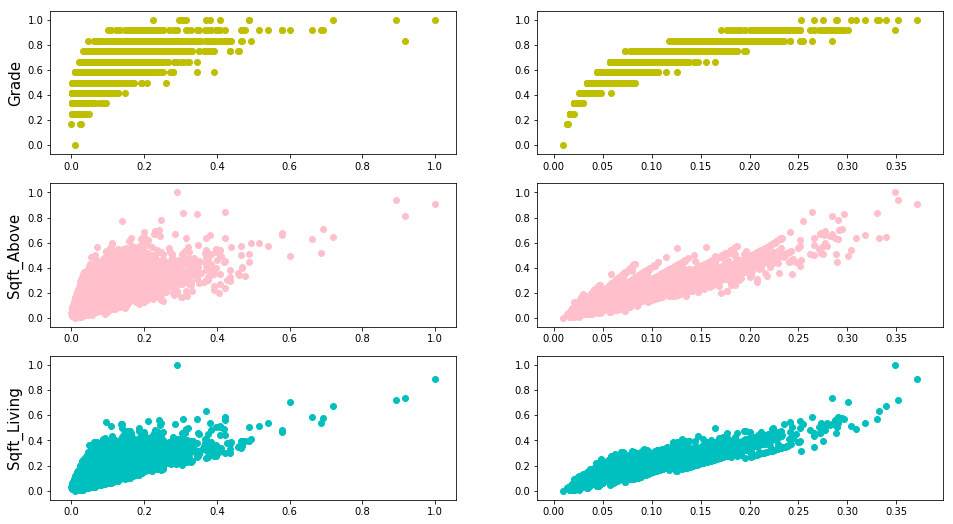

In [26]:
plt.subplots(3,2, figsize = (16,9),)

plt.subplot(3,2,5)
plt.scatter(df_norm["price"], df_norm["sqft_living"], c='c')
plt.ylabel('Sqft_Living', fontsize = 15)

plt.subplot(3, 2, 6)
plt.scatter(df_norm["pred"], df_norm["sqft_living"], c= 'c')

plt.subplot(3,2,1)
plt.scatter(df_norm["price"], df_norm["grade"],c= 'y')
plt.ylabel('Grade',fontsize = 15)

plt.subplot(3, 2, 2)
plt.scatter(df_norm["pred"], df_norm["grade"], c='y')

plt.subplot(3,2,3)
plt.scatter(df_norm["price"], df_norm["sqft_above"], c='pink')
plt.ylabel('Sqft_Above', fontsize = 15)

plt.subplot(3, 2, 4)
plt.scatter(df_norm["pred"], df_norm["sqft_above"], c='pink')

plt.show()

In [30]:
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Creates model
model = Sequential()
# 8 Neurons, expects input of 3 features. 
# Play around with the number of neurons!!
model.add(Dense(3, input_dim=3))
# Add another Densely Connected layer (every neuron connected to every neuron in the next layer)
model.add(Dense(8, activation='relu'))
# Last layer simple sigmoid function to output 0 or 1 (our label)
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [25]:
X = df_norm[['sqft_living', 'grade', 'sqft_above']]
Y = df_norm["price"]
# Play around with number of epochs as well!
model.fit(X,Y,epochs=5000, verbose=2, batch_size = 1000)

Epoch 1/5000
 - 0s - loss: 0.2215
Epoch 2/5000
 - 0s - loss: 0.1924
Epoch 3/5000
 - 0s - loss: 0.1769
Epoch 4/5000
 - 0s - loss: 0.1692
Epoch 5/5000
 - 0s - loss: 0.1613
Epoch 6/5000
 - 0s - loss: 0.1526
Epoch 7/5000
 - 0s - loss: 0.1355
Epoch 8/5000
 - 0s - loss: 0.1102
Epoch 9/5000
 - 0s - loss: 0.0869
Epoch 10/5000
 - 0s - loss: 0.0665
Epoch 11/5000
 - 0s - loss: 0.0497
Epoch 12/5000
 - 0s - loss: 0.0366
Epoch 13/5000
 - 0s - loss: 0.0269
Epoch 14/5000
 - 0s - loss: 0.0200
Epoch 15/5000
 - 0s - loss: 0.0139
Epoch 16/5000
 - 0s - loss: 0.0081
Epoch 17/5000
 - 0s - loss: 0.0054
Epoch 18/5000
 - 0s - loss: 0.0043
Epoch 19/5000
 - 0s - loss: 0.0037
Epoch 20/5000
 - 0s - loss: 0.0034
Epoch 21/5000
 - 0s - loss: 0.0033
Epoch 22/5000
 - 0s - loss: 0.0032
Epoch 23/5000
 - 0s - loss: 0.0031
Epoch 24/5000
 - 0s - loss: 0.0030
Epoch 25/5000
 - 0s - loss: 0.0030
Epoch 26/5000
 - 0s - loss: 0.0030
Epoch 27/5000
 - 0s - loss: 0.0029
Epoch 28/5000
 - 0s - loss: 0.0029
Epoch 29/5000
 - 0s - loss: 0

Epoch 223/5000
 - 0s - loss: 9.1653e-04
Epoch 224/5000
 - 0s - loss: 9.1638e-04
Epoch 225/5000
 - 0s - loss: 9.1449e-04
Epoch 226/5000
 - 0s - loss: 9.1349e-04
Epoch 227/5000
 - 0s - loss: 9.1470e-04
Epoch 228/5000
 - 0s - loss: 9.1406e-04
Epoch 229/5000
 - 0s - loss: 9.1349e-04
Epoch 230/5000
 - 0s - loss: 9.1337e-04
Epoch 231/5000
 - 0s - loss: 9.1294e-04
Epoch 232/5000
 - 0s - loss: 9.1320e-04
Epoch 233/5000
 - 0s - loss: 9.1442e-04
Epoch 234/5000
 - 0s - loss: 9.1207e-04
Epoch 235/5000
 - 0s - loss: 9.1296e-04
Epoch 236/5000
 - 0s - loss: 9.1164e-04
Epoch 237/5000
 - 0s - loss: 9.1498e-04
Epoch 238/5000
 - 0s - loss: 9.1360e-04
Epoch 239/5000
 - 0s - loss: 9.1276e-04
Epoch 240/5000
 - 0s - loss: 9.1392e-04
Epoch 241/5000
 - 0s - loss: 9.1181e-04
Epoch 242/5000
 - 0s - loss: 9.1131e-04
Epoch 243/5000
 - 0s - loss: 9.1094e-04
Epoch 244/5000
 - 0s - loss: 9.1130e-04
Epoch 245/5000
 - 0s - loss: 9.1105e-04
Epoch 246/5000
 - 0s - loss: 9.1073e-04
Epoch 247/5000
 - 0s - loss: 9.1028e-04


Epoch 428/5000
 - 0s - loss: 9.0972e-04
Epoch 429/5000
 - 0s - loss: 9.0723e-04
Epoch 430/5000
 - 0s - loss: 9.0851e-04
Epoch 431/5000
 - 0s - loss: 9.0797e-04
Epoch 432/5000
 - 0s - loss: 9.0725e-04
Epoch 433/5000
 - 0s - loss: 9.0837e-04
Epoch 434/5000
 - 0s - loss: 9.0928e-04
Epoch 435/5000
 - 0s - loss: 9.0823e-04
Epoch 436/5000
 - 0s - loss: 9.0656e-04
Epoch 437/5000
 - 0s - loss: 9.0974e-04
Epoch 438/5000
 - 0s - loss: 9.0707e-04
Epoch 439/5000
 - 0s - loss: 9.0803e-04
Epoch 440/5000
 - 0s - loss: 9.1094e-04
Epoch 441/5000
 - 0s - loss: 9.0818e-04
Epoch 442/5000
 - 0s - loss: 9.0856e-04
Epoch 443/5000
 - 0s - loss: 9.0836e-04
Epoch 444/5000
 - 0s - loss: 9.0875e-04
Epoch 445/5000
 - 0s - loss: 9.0698e-04
Epoch 446/5000
 - 0s - loss: 9.0792e-04
Epoch 447/5000
 - 0s - loss: 9.0743e-04
Epoch 448/5000
 - 0s - loss: 9.0755e-04
Epoch 449/5000
 - 0s - loss: 9.0978e-04
Epoch 450/5000
 - 0s - loss: 9.0967e-04
Epoch 451/5000
 - 0s - loss: 9.0710e-04
Epoch 452/5000
 - 0s - loss: 9.0746e-04


Epoch 633/5000
 - 0s - loss: 9.0760e-04
Epoch 634/5000
 - 0s - loss: 9.0641e-04
Epoch 635/5000
 - 0s - loss: 9.0697e-04
Epoch 636/5000
 - 0s - loss: 9.0811e-04
Epoch 637/5000
 - 0s - loss: 9.0825e-04
Epoch 638/5000
 - 0s - loss: 9.0680e-04
Epoch 639/5000
 - 0s - loss: 9.0958e-04
Epoch 640/5000
 - 0s - loss: 9.0761e-04
Epoch 641/5000
 - 0s - loss: 9.0748e-04
Epoch 642/5000
 - 0s - loss: 9.0664e-04
Epoch 643/5000
 - 0s - loss: 9.0787e-04
Epoch 644/5000
 - 0s - loss: 9.1121e-04
Epoch 645/5000
 - 0s - loss: 9.0686e-04
Epoch 646/5000
 - 0s - loss: 9.0673e-04
Epoch 647/5000
 - 0s - loss: 9.0745e-04
Epoch 648/5000
 - 0s - loss: 9.0738e-04
Epoch 649/5000
 - 0s - loss: 9.0668e-04
Epoch 650/5000
 - 0s - loss: 9.0805e-04
Epoch 651/5000
 - 0s - loss: 9.0897e-04
Epoch 652/5000
 - 0s - loss: 9.0738e-04
Epoch 653/5000
 - 0s - loss: 9.0688e-04
Epoch 654/5000
 - 0s - loss: 9.0813e-04
Epoch 655/5000
 - 0s - loss: 9.0941e-04
Epoch 656/5000
 - 0s - loss: 9.0704e-04
Epoch 657/5000
 - 0s - loss: 9.0876e-04


Epoch 838/5000
 - 0s - loss: 9.0811e-04
Epoch 839/5000
 - 0s - loss: 9.0700e-04
Epoch 840/5000
 - 0s - loss: 9.0653e-04
Epoch 841/5000
 - 0s - loss: 9.1017e-04
Epoch 842/5000
 - 0s - loss: 9.0931e-04
Epoch 843/5000
 - 0s - loss: 9.0658e-04
Epoch 844/5000
 - 0s - loss: 9.0698e-04
Epoch 845/5000
 - 0s - loss: 9.0656e-04
Epoch 846/5000
 - 0s - loss: 9.0670e-04
Epoch 847/5000
 - 0s - loss: 9.0901e-04
Epoch 848/5000
 - 0s - loss: 9.0689e-04
Epoch 849/5000
 - 0s - loss: 9.0652e-04
Epoch 850/5000
 - 0s - loss: 9.0853e-04
Epoch 851/5000
 - 0s - loss: 9.0682e-04
Epoch 852/5000
 - 0s - loss: 9.0757e-04
Epoch 853/5000
 - 0s - loss: 9.0665e-04
Epoch 854/5000
 - 0s - loss: 9.0710e-04
Epoch 855/5000
 - 0s - loss: 9.0772e-04
Epoch 856/5000
 - 0s - loss: 9.0675e-04
Epoch 857/5000
 - 0s - loss: 9.0720e-04
Epoch 858/5000
 - 0s - loss: 9.0776e-04
Epoch 859/5000
 - 0s - loss: 9.0825e-04
Epoch 860/5000
 - 0s - loss: 9.0741e-04
Epoch 861/5000
 - 0s - loss: 9.0713e-04
Epoch 862/5000
 - 0s - loss: 9.0717e-04


Epoch 1042/5000
 - 0s - loss: 9.0658e-04
Epoch 1043/5000
 - 0s - loss: 9.0608e-04
Epoch 1044/5000
 - 0s - loss: 9.0620e-04
Epoch 1045/5000
 - 0s - loss: 9.0633e-04
Epoch 1046/5000
 - 0s - loss: 9.0714e-04
Epoch 1047/5000
 - 0s - loss: 9.0552e-04
Epoch 1048/5000
 - 0s - loss: 9.0746e-04
Epoch 1049/5000
 - 0s - loss: 9.0586e-04
Epoch 1050/5000
 - 0s - loss: 9.0634e-04
Epoch 1051/5000
 - 0s - loss: 9.0594e-04
Epoch 1052/5000
 - 0s - loss: 9.0700e-04
Epoch 1053/5000
 - 0s - loss: 9.0661e-04
Epoch 1054/5000
 - 0s - loss: 9.1245e-04
Epoch 1055/5000
 - 0s - loss: 9.0694e-04
Epoch 1056/5000
 - 0s - loss: 9.0648e-04
Epoch 1057/5000
 - 0s - loss: 9.0599e-04
Epoch 1058/5000
 - 0s - loss: 9.0732e-04
Epoch 1059/5000
 - 0s - loss: 9.0584e-04
Epoch 1060/5000
 - 0s - loss: 9.0604e-04
Epoch 1061/5000
 - 0s - loss: 9.0558e-04
Epoch 1062/5000
 - 0s - loss: 9.0652e-04
Epoch 1063/5000
 - 0s - loss: 9.0669e-04
Epoch 1064/5000
 - 0s - loss: 9.0702e-04
Epoch 1065/5000
 - 0s - loss: 9.0609e-04
Epoch 1066/5000


Epoch 1242/5000
 - 0s - loss: 9.0706e-04
Epoch 1243/5000
 - 0s - loss: 9.0494e-04
Epoch 1244/5000
 - 0s - loss: 9.0502e-04
Epoch 1245/5000
 - 0s - loss: 9.0630e-04
Epoch 1246/5000
 - 0s - loss: 9.0648e-04
Epoch 1247/5000
 - 0s - loss: 9.0548e-04
Epoch 1248/5000
 - 0s - loss: 9.0585e-04
Epoch 1249/5000
 - 0s - loss: 9.0624e-04
Epoch 1250/5000
 - 0s - loss: 9.0533e-04
Epoch 1251/5000
 - 0s - loss: 9.0424e-04
Epoch 1252/5000
 - 0s - loss: 9.0509e-04
Epoch 1253/5000
 - 0s - loss: 9.0493e-04
Epoch 1254/5000
 - 0s - loss: 9.0541e-04
Epoch 1255/5000
 - 0s - loss: 9.0479e-04
Epoch 1256/5000
 - 0s - loss: 9.0461e-04
Epoch 1257/5000
 - 0s - loss: 9.0815e-04
Epoch 1258/5000
 - 0s - loss: 9.0455e-04
Epoch 1259/5000
 - 0s - loss: 9.0645e-04
Epoch 1260/5000
 - 0s - loss: 9.0699e-04
Epoch 1261/5000
 - 0s - loss: 9.0447e-04
Epoch 1262/5000
 - 0s - loss: 9.0434e-04
Epoch 1263/5000
 - 0s - loss: 9.0619e-04
Epoch 1264/5000
 - 0s - loss: 9.0468e-04
Epoch 1265/5000
 - 0s - loss: 9.0453e-04
Epoch 1266/5000


Epoch 1442/5000
 - 0s - loss: 9.0059e-04
Epoch 1443/5000
 - 0s - loss: 9.0144e-04
Epoch 1444/5000
 - 0s - loss: 9.0097e-04
Epoch 1445/5000
 - 0s - loss: 9.0088e-04
Epoch 1446/5000
 - 0s - loss: 9.0095e-04
Epoch 1447/5000
 - 0s - loss: 9.0228e-04
Epoch 1448/5000
 - 0s - loss: 9.0325e-04
Epoch 1449/5000
 - 0s - loss: 9.0602e-04
Epoch 1450/5000
 - 0s - loss: 9.0075e-04
Epoch 1451/5000
 - 0s - loss: 9.0484e-04
Epoch 1452/5000
 - 0s - loss: 9.0218e-04
Epoch 1453/5000
 - 0s - loss: 9.0155e-04
Epoch 1454/5000
 - 0s - loss: 9.0410e-04
Epoch 1455/5000
 - 0s - loss: 9.0042e-04
Epoch 1456/5000
 - 0s - loss: 8.9996e-04
Epoch 1457/5000
 - 0s - loss: 9.0033e-04
Epoch 1458/5000
 - 0s - loss: 9.0024e-04
Epoch 1459/5000
 - 0s - loss: 9.0231e-04
Epoch 1460/5000
 - 0s - loss: 9.0387e-04
Epoch 1461/5000
 - 0s - loss: 9.0119e-04
Epoch 1462/5000
 - 0s - loss: 8.9982e-04
Epoch 1463/5000
 - 0s - loss: 9.0133e-04
Epoch 1464/5000
 - 0s - loss: 8.9999e-04
Epoch 1465/5000
 - 0s - loss: 8.9968e-04
Epoch 1466/5000


Epoch 1642/5000
 - 0s - loss: 8.9726e-04
Epoch 1643/5000
 - 0s - loss: 8.9834e-04
Epoch 1644/5000
 - 0s - loss: 8.9982e-04
Epoch 1645/5000
 - 0s - loss: 8.9717e-04
Epoch 1646/5000
 - 0s - loss: 8.9652e-04
Epoch 1647/5000
 - 0s - loss: 8.9728e-04
Epoch 1648/5000
 - 0s - loss: 8.9726e-04
Epoch 1649/5000
 - 0s - loss: 8.9825e-04
Epoch 1650/5000
 - 0s - loss: 8.9991e-04
Epoch 1651/5000
 - 0s - loss: 8.9625e-04
Epoch 1652/5000
 - 0s - loss: 8.9882e-04
Epoch 1653/5000
 - 0s - loss: 8.9929e-04
Epoch 1654/5000
 - 0s - loss: 9.0037e-04
Epoch 1655/5000
 - 0s - loss: 8.9913e-04
Epoch 1656/5000
 - 0s - loss: 8.9780e-04
Epoch 1657/5000
 - 0s - loss: 8.9856e-04
Epoch 1658/5000
 - 0s - loss: 8.9684e-04
Epoch 1659/5000
 - 0s - loss: 8.9810e-04
Epoch 1660/5000
 - 0s - loss: 8.9920e-04
Epoch 1661/5000
 - 0s - loss: 8.9703e-04
Epoch 1662/5000
 - 0s - loss: 8.9720e-04
Epoch 1663/5000
 - 0s - loss: 8.9688e-04
Epoch 1664/5000
 - 0s - loss: 8.9687e-04
Epoch 1665/5000
 - 0s - loss: 8.9663e-04
Epoch 1666/5000


Epoch 1842/5000
 - 0s - loss: 8.9444e-04
Epoch 1843/5000
 - 0s - loss: 8.9473e-04
Epoch 1844/5000
 - 0s - loss: 8.9525e-04
Epoch 1845/5000
 - 0s - loss: 8.9524e-04
Epoch 1846/5000
 - 0s - loss: 8.9492e-04
Epoch 1847/5000
 - 0s - loss: 8.9540e-04
Epoch 1848/5000
 - 0s - loss: 8.9591e-04
Epoch 1849/5000
 - 0s - loss: 8.9572e-04
Epoch 1850/5000
 - 0s - loss: 8.9490e-04
Epoch 1851/5000
 - 0s - loss: 8.9869e-04
Epoch 1852/5000
 - 0s - loss: 8.9657e-04
Epoch 1853/5000
 - 0s - loss: 8.9721e-04
Epoch 1854/5000
 - 0s - loss: 8.9800e-04
Epoch 1855/5000
 - 0s - loss: 8.9707e-04
Epoch 1856/5000
 - 0s - loss: 8.9644e-04
Epoch 1857/5000
 - 0s - loss: 8.9655e-04
Epoch 1858/5000
 - 0s - loss: 8.9575e-04
Epoch 1859/5000
 - 0s - loss: 8.9530e-04
Epoch 1860/5000
 - 0s - loss: 8.9483e-04
Epoch 1861/5000
 - 0s - loss: 8.9663e-04
Epoch 1862/5000
 - 0s - loss: 8.9490e-04
Epoch 1863/5000
 - 0s - loss: 8.9464e-04
Epoch 1864/5000
 - 0s - loss: 8.9630e-04
Epoch 1865/5000
 - 0s - loss: 8.9436e-04
Epoch 1866/5000


Epoch 2042/5000
 - 0s - loss: 8.9505e-04
Epoch 2043/5000
 - 0s - loss: 8.9420e-04
Epoch 2044/5000
 - 0s - loss: 8.9657e-04
Epoch 2045/5000
 - 0s - loss: 8.9550e-04
Epoch 2046/5000
 - 0s - loss: 8.9445e-04
Epoch 2047/5000
 - 0s - loss: 8.9639e-04
Epoch 2048/5000
 - 0s - loss: 8.9349e-04
Epoch 2049/5000
 - 0s - loss: 8.9432e-04
Epoch 2050/5000
 - 0s - loss: 8.9341e-04
Epoch 2051/5000
 - 0s - loss: 8.9383e-04
Epoch 2052/5000
 - 0s - loss: 8.9433e-04
Epoch 2053/5000
 - 0s - loss: 8.9449e-04
Epoch 2054/5000
 - 0s - loss: 8.9588e-04
Epoch 2055/5000
 - 0s - loss: 8.9408e-04
Epoch 2056/5000
 - 0s - loss: 8.9352e-04
Epoch 2057/5000
 - 0s - loss: 8.9397e-04
Epoch 2058/5000
 - 0s - loss: 8.9579e-04
Epoch 2059/5000
 - 0s - loss: 8.9598e-04
Epoch 2060/5000
 - 0s - loss: 8.9366e-04
Epoch 2061/5000
 - 0s - loss: 8.9626e-04
Epoch 2062/5000
 - 0s - loss: 8.9417e-04
Epoch 2063/5000
 - 0s - loss: 8.9575e-04
Epoch 2064/5000
 - 0s - loss: 8.9469e-04
Epoch 2065/5000
 - 0s - loss: 8.9554e-04
Epoch 2066/5000


Epoch 2242/5000
 - 0s - loss: 8.9288e-04
Epoch 2243/5000
 - 0s - loss: 8.9437e-04
Epoch 2244/5000
 - 0s - loss: 8.9296e-04
Epoch 2245/5000
 - 0s - loss: 8.9425e-04
Epoch 2246/5000
 - 0s - loss: 8.9749e-04
Epoch 2247/5000
 - 0s - loss: 8.9541e-04
Epoch 2248/5000
 - 0s - loss: 8.9412e-04
Epoch 2249/5000
 - 0s - loss: 8.9496e-04
Epoch 2250/5000
 - 0s - loss: 8.9284e-04
Epoch 2251/5000
 - 0s - loss: 8.9340e-04
Epoch 2252/5000
 - 0s - loss: 8.9373e-04
Epoch 2253/5000
 - 0s - loss: 8.9460e-04
Epoch 2254/5000
 - 0s - loss: 8.9444e-04
Epoch 2255/5000
 - 0s - loss: 8.9314e-04
Epoch 2256/5000
 - 0s - loss: 8.9342e-04
Epoch 2257/5000
 - 0s - loss: 8.9362e-04
Epoch 2258/5000
 - 0s - loss: 8.9319e-04
Epoch 2259/5000
 - 0s - loss: 8.9370e-04
Epoch 2260/5000
 - 0s - loss: 8.9327e-04
Epoch 2261/5000
 - 0s - loss: 8.9260e-04
Epoch 2262/5000
 - 0s - loss: 8.9386e-04
Epoch 2263/5000
 - 0s - loss: 8.9321e-04
Epoch 2264/5000
 - 0s - loss: 8.9393e-04
Epoch 2265/5000
 - 0s - loss: 8.9458e-04
Epoch 2266/5000


Epoch 2442/5000
 - 0s - loss: 8.9578e-04
Epoch 2443/5000
 - 0s - loss: 8.9354e-04
Epoch 2444/5000
 - 0s - loss: 8.9318e-04
Epoch 2445/5000
 - 0s - loss: 8.9263e-04
Epoch 2446/5000
 - 0s - loss: 8.9274e-04
Epoch 2447/5000
 - 0s - loss: 8.9326e-04
Epoch 2448/5000
 - 0s - loss: 8.9402e-04
Epoch 2449/5000
 - 0s - loss: 8.9336e-04
Epoch 2450/5000
 - 0s - loss: 8.9323e-04
Epoch 2451/5000
 - 0s - loss: 8.9326e-04
Epoch 2452/5000
 - 0s - loss: 8.9367e-04
Epoch 2453/5000
 - 0s - loss: 8.9522e-04
Epoch 2454/5000
 - 0s - loss: 8.9211e-04
Epoch 2455/5000
 - 0s - loss: 8.9256e-04
Epoch 2456/5000
 - 0s - loss: 8.9267e-04
Epoch 2457/5000
 - 0s - loss: 8.9207e-04
Epoch 2458/5000
 - 0s - loss: 8.9152e-04
Epoch 2459/5000
 - 0s - loss: 8.9916e-04
Epoch 2460/5000
 - 0s - loss: 8.9241e-04
Epoch 2461/5000
 - 0s - loss: 8.9350e-04
Epoch 2462/5000
 - 0s - loss: 8.9701e-04
Epoch 2463/5000
 - 0s - loss: 8.9701e-04
Epoch 2464/5000
 - 0s - loss: 8.9399e-04
Epoch 2465/5000
 - 0s - loss: 8.9339e-04
Epoch 2466/5000


Epoch 2642/5000
 - 0s - loss: 8.9434e-04
Epoch 2643/5000
 - 0s - loss: 8.9399e-04
Epoch 2644/5000
 - 0s - loss: 8.9431e-04
Epoch 2645/5000
 - 0s - loss: 8.9415e-04
Epoch 2646/5000
 - 0s - loss: 8.9177e-04
Epoch 2647/5000
 - 0s - loss: 8.9191e-04
Epoch 2648/5000
 - 0s - loss: 8.9272e-04
Epoch 2649/5000
 - 0s - loss: 8.9182e-04
Epoch 2650/5000
 - 0s - loss: 8.9263e-04
Epoch 2651/5000
 - 0s - loss: 8.9274e-04
Epoch 2652/5000
 - 0s - loss: 8.9467e-04
Epoch 2653/5000
 - 0s - loss: 8.9198e-04
Epoch 2654/5000
 - 0s - loss: 8.9190e-04
Epoch 2655/5000
 - 0s - loss: 8.9168e-04
Epoch 2656/5000
 - 0s - loss: 8.9226e-04
Epoch 2657/5000
 - 0s - loss: 8.9306e-04
Epoch 2658/5000
 - 0s - loss: 8.9310e-04
Epoch 2659/5000
 - 0s - loss: 8.9336e-04
Epoch 2660/5000
 - 0s - loss: 8.9298e-04
Epoch 2661/5000
 - 0s - loss: 8.9294e-04
Epoch 2662/5000
 - 0s - loss: 8.9538e-04
Epoch 2663/5000
 - 0s - loss: 8.9321e-04
Epoch 2664/5000
 - 0s - loss: 8.9201e-04
Epoch 2665/5000
 - 0s - loss: 8.9278e-04
Epoch 2666/5000


Epoch 2842/5000
 - 0s - loss: 8.9212e-04
Epoch 2843/5000
 - 0s - loss: 8.9144e-04
Epoch 2844/5000
 - 0s - loss: 8.9200e-04
Epoch 2845/5000
 - 0s - loss: 8.9253e-04
Epoch 2846/5000
 - 0s - loss: 8.9065e-04
Epoch 2847/5000
 - 0s - loss: 8.9521e-04
Epoch 2848/5000
 - 0s - loss: 8.9138e-04
Epoch 2849/5000
 - 0s - loss: 8.9306e-04
Epoch 2850/5000
 - 0s - loss: 8.9444e-04
Epoch 2851/5000
 - 0s - loss: 8.9126e-04
Epoch 2852/5000
 - 0s - loss: 8.9554e-04
Epoch 2853/5000
 - 0s - loss: 8.9236e-04
Epoch 2854/5000
 - 0s - loss: 8.9424e-04
Epoch 2855/5000
 - 0s - loss: 8.9361e-04
Epoch 2856/5000
 - 0s - loss: 8.9140e-04
Epoch 2857/5000
 - 0s - loss: 8.9426e-04
Epoch 2858/5000
 - 0s - loss: 8.9648e-04
Epoch 2859/5000
 - 0s - loss: 8.9136e-04
Epoch 2860/5000
 - 0s - loss: 8.9107e-04
Epoch 2861/5000
 - 0s - loss: 8.9246e-04
Epoch 2862/5000
 - 0s - loss: 8.9269e-04
Epoch 2863/5000
 - 0s - loss: 8.9113e-04
Epoch 2864/5000
 - 0s - loss: 8.9093e-04
Epoch 2865/5000
 - 0s - loss: 8.9287e-04
Epoch 2866/5000


Epoch 3042/5000
 - 0s - loss: 8.9234e-04
Epoch 3043/5000
 - 0s - loss: 8.9468e-04
Epoch 3044/5000
 - 0s - loss: 8.9221e-04
Epoch 3045/5000
 - 0s - loss: 8.9352e-04
Epoch 3046/5000
 - 0s - loss: 8.9188e-04
Epoch 3047/5000
 - 0s - loss: 8.9134e-04
Epoch 3048/5000
 - 0s - loss: 8.9046e-04
Epoch 3049/5000
 - 0s - loss: 8.9070e-04
Epoch 3050/5000
 - 0s - loss: 8.9289e-04
Epoch 3051/5000
 - 0s - loss: 8.9397e-04
Epoch 3052/5000
 - 0s - loss: 8.9109e-04
Epoch 3053/5000
 - 0s - loss: 8.9107e-04
Epoch 3054/5000
 - 0s - loss: 8.9190e-04
Epoch 3055/5000
 - 0s - loss: 8.9268e-04
Epoch 3056/5000
 - 0s - loss: 8.9249e-04
Epoch 3057/5000
 - 0s - loss: 8.9272e-04
Epoch 3058/5000
 - 0s - loss: 8.9094e-04
Epoch 3059/5000
 - 0s - loss: 8.9143e-04
Epoch 3060/5000
 - 0s - loss: 8.9323e-04
Epoch 3061/5000
 - 0s - loss: 8.9334e-04
Epoch 3062/5000
 - 0s - loss: 8.9452e-04
Epoch 3063/5000
 - 0s - loss: 8.9160e-04
Epoch 3064/5000
 - 0s - loss: 8.9122e-04
Epoch 3065/5000
 - 0s - loss: 8.9316e-04
Epoch 3066/5000


Epoch 3242/5000
 - 0s - loss: 8.9127e-04
Epoch 3243/5000
 - 0s - loss: 8.9009e-04
Epoch 3244/5000
 - 0s - loss: 8.9073e-04
Epoch 3245/5000
 - 0s - loss: 8.9115e-04
Epoch 3246/5000
 - 0s - loss: 8.9081e-04
Epoch 3247/5000
 - 0s - loss: 8.9353e-04
Epoch 3248/5000
 - 0s - loss: 8.9252e-04
Epoch 3249/5000
 - 0s - loss: 8.9312e-04
Epoch 3250/5000
 - 0s - loss: 8.9208e-04
Epoch 3251/5000
 - 0s - loss: 8.9039e-04
Epoch 3252/5000
 - 0s - loss: 8.9016e-04
Epoch 3253/5000
 - 0s - loss: 8.9057e-04
Epoch 3254/5000
 - 0s - loss: 8.9079e-04
Epoch 3255/5000
 - 0s - loss: 8.9091e-04
Epoch 3256/5000
 - 0s - loss: 8.9074e-04
Epoch 3257/5000
 - 0s - loss: 8.9059e-04
Epoch 3258/5000
 - 0s - loss: 8.9057e-04
Epoch 3259/5000
 - 0s - loss: 8.9228e-04
Epoch 3260/5000
 - 0s - loss: 8.9004e-04
Epoch 3261/5000
 - 0s - loss: 8.9028e-04
Epoch 3262/5000
 - 0s - loss: 8.9062e-04
Epoch 3263/5000
 - 0s - loss: 8.9075e-04
Epoch 3264/5000
 - 0s - loss: 8.9075e-04
Epoch 3265/5000
 - 0s - loss: 8.9244e-04
Epoch 3266/5000


Epoch 3442/5000
 - 0s - loss: 8.9509e-04
Epoch 3443/5000
 - 0s - loss: 8.9259e-04
Epoch 3444/5000
 - 0s - loss: 8.9230e-04
Epoch 3445/5000
 - 0s - loss: 8.9175e-04
Epoch 3446/5000
 - 0s - loss: 8.9282e-04
Epoch 3447/5000
 - 0s - loss: 8.9320e-04
Epoch 3448/5000
 - 0s - loss: 8.9139e-04
Epoch 3449/5000
 - 0s - loss: 8.9149e-04
Epoch 3450/5000
 - 0s - loss: 8.9175e-04
Epoch 3451/5000
 - 0s - loss: 8.9308e-04
Epoch 3452/5000
 - 0s - loss: 8.9147e-04
Epoch 3453/5000
 - 0s - loss: 8.9151e-04
Epoch 3454/5000
 - 0s - loss: 8.9185e-04
Epoch 3455/5000
 - 0s - loss: 8.9073e-04
Epoch 3456/5000
 - 0s - loss: 8.8990e-04
Epoch 3457/5000
 - 0s - loss: 8.9017e-04
Epoch 3458/5000
 - 0s - loss: 8.9067e-04
Epoch 3459/5000
 - 0s - loss: 8.9131e-04
Epoch 3460/5000
 - 0s - loss: 8.9498e-04
Epoch 3461/5000
 - 0s - loss: 8.9201e-04
Epoch 3462/5000
 - 0s - loss: 8.9012e-04
Epoch 3463/5000
 - 0s - loss: 8.9001e-04
Epoch 3464/5000
 - 0s - loss: 8.9075e-04
Epoch 3465/5000
 - 0s - loss: 8.9041e-04
Epoch 3466/5000


Epoch 3642/5000
 - 0s - loss: 8.9188e-04
Epoch 3643/5000
 - 0s - loss: 8.9008e-04
Epoch 3644/5000
 - 0s - loss: 8.9012e-04
Epoch 3645/5000
 - 0s - loss: 8.9093e-04
Epoch 3646/5000
 - 0s - loss: 8.9075e-04
Epoch 3647/5000
 - 0s - loss: 8.9310e-04
Epoch 3648/5000
 - 0s - loss: 8.9099e-04
Epoch 3649/5000
 - 0s - loss: 8.9028e-04
Epoch 3650/5000
 - 0s - loss: 8.9279e-04
Epoch 3651/5000
 - 0s - loss: 8.8932e-04
Epoch 3652/5000
 - 0s - loss: 8.9178e-04
Epoch 3653/5000
 - 0s - loss: 8.9104e-04
Epoch 3654/5000
 - 0s - loss: 8.9200e-04
Epoch 3655/5000
 - 0s - loss: 8.9000e-04
Epoch 3656/5000
 - 0s - loss: 8.8986e-04
Epoch 3657/5000
 - 0s - loss: 8.8994e-04
Epoch 3658/5000
 - 0s - loss: 8.9304e-04
Epoch 3659/5000
 - 0s - loss: 8.9047e-04
Epoch 3660/5000
 - 0s - loss: 8.9280e-04
Epoch 3661/5000
 - 0s - loss: 8.9128e-04
Epoch 3662/5000
 - 0s - loss: 8.9098e-04
Epoch 3663/5000
 - 0s - loss: 8.9179e-04
Epoch 3664/5000
 - 0s - loss: 8.9192e-04
Epoch 3665/5000
 - 0s - loss: 8.9067e-04
Epoch 3666/5000


Epoch 3842/5000
 - 0s - loss: 8.8947e-04
Epoch 3843/5000
 - 0s - loss: 8.8989e-04
Epoch 3844/5000
 - 0s - loss: 8.9048e-04
Epoch 3845/5000
 - 0s - loss: 8.9171e-04
Epoch 3846/5000
 - 0s - loss: 8.9073e-04
Epoch 3847/5000
 - 0s - loss: 8.9021e-04
Epoch 3848/5000
 - 0s - loss: 8.8990e-04
Epoch 3849/5000
 - 0s - loss: 8.9204e-04
Epoch 3850/5000
 - 0s - loss: 8.9190e-04
Epoch 3851/5000
 - 0s - loss: 8.9133e-04
Epoch 3852/5000
 - 0s - loss: 8.9040e-04
Epoch 3853/5000
 - 0s - loss: 8.8969e-04
Epoch 3854/5000
 - 0s - loss: 8.9029e-04
Epoch 3855/5000
 - 0s - loss: 8.9337e-04
Epoch 3856/5000
 - 0s - loss: 8.9073e-04
Epoch 3857/5000
 - 0s - loss: 8.9327e-04
Epoch 3858/5000
 - 0s - loss: 8.9211e-04
Epoch 3859/5000
 - 0s - loss: 8.9088e-04
Epoch 3860/5000
 - 0s - loss: 8.9027e-04
Epoch 3861/5000
 - 0s - loss: 8.8977e-04
Epoch 3862/5000
 - 0s - loss: 8.9217e-04
Epoch 3863/5000
 - 0s - loss: 8.9302e-04
Epoch 3864/5000
 - 0s - loss: 8.9083e-04
Epoch 3865/5000
 - 0s - loss: 8.9130e-04
Epoch 3866/5000


Epoch 4042/5000
 - 0s - loss: 8.8927e-04
Epoch 4043/5000
 - 0s - loss: 8.9359e-04
Epoch 4044/5000
 - 0s - loss: 8.9177e-04
Epoch 4045/5000
 - 0s - loss: 8.8851e-04
Epoch 4046/5000
 - 0s - loss: 8.8994e-04
Epoch 4047/5000
 - 0s - loss: 8.8924e-04
Epoch 4048/5000
 - 0s - loss: 8.9203e-04
Epoch 4049/5000
 - 0s - loss: 8.9331e-04
Epoch 4050/5000
 - 0s - loss: 8.9040e-04
Epoch 4051/5000
 - 0s - loss: 8.9121e-04
Epoch 4052/5000
 - 0s - loss: 8.8974e-04
Epoch 4053/5000
 - 0s - loss: 8.8982e-04
Epoch 4054/5000
 - 0s - loss: 8.9119e-04
Epoch 4055/5000
 - 0s - loss: 8.9118e-04
Epoch 4056/5000
 - 0s - loss: 8.9205e-04
Epoch 4057/5000
 - 0s - loss: 8.9143e-04
Epoch 4058/5000
 - 0s - loss: 8.9191e-04
Epoch 4059/5000
 - 0s - loss: 8.9274e-04
Epoch 4060/5000
 - 0s - loss: 8.9034e-04
Epoch 4061/5000
 - 0s - loss: 8.8980e-04
Epoch 4062/5000
 - 0s - loss: 8.9008e-04
Epoch 4063/5000
 - 0s - loss: 8.9210e-04
Epoch 4064/5000
 - 0s - loss: 8.9021e-04
Epoch 4065/5000
 - 0s - loss: 8.9158e-04
Epoch 4066/5000


Epoch 4242/5000
 - 0s - loss: 8.9151e-04
Epoch 4243/5000
 - 0s - loss: 8.8915e-04
Epoch 4244/5000
 - 0s - loss: 8.8952e-04
Epoch 4245/5000
 - 0s - loss: 8.8932e-04
Epoch 4246/5000
 - 0s - loss: 8.8982e-04
Epoch 4247/5000
 - 0s - loss: 8.8941e-04
Epoch 4248/5000
 - 0s - loss: 8.9009e-04
Epoch 4249/5000
 - 0s - loss: 8.8935e-04
Epoch 4250/5000
 - 0s - loss: 8.8965e-04
Epoch 4251/5000
 - 0s - loss: 8.9037e-04
Epoch 4252/5000
 - 0s - loss: 8.9047e-04
Epoch 4253/5000
 - 0s - loss: 8.8937e-04
Epoch 4254/5000
 - 0s - loss: 8.9123e-04
Epoch 4255/5000
 - 0s - loss: 8.9112e-04
Epoch 4256/5000
 - 0s - loss: 8.9093e-04
Epoch 4257/5000
 - 0s - loss: 8.9008e-04
Epoch 4258/5000
 - 0s - loss: 8.9062e-04
Epoch 4259/5000
 - 0s - loss: 8.8978e-04
Epoch 4260/5000
 - 0s - loss: 8.8995e-04
Epoch 4261/5000
 - 0s - loss: 8.8922e-04
Epoch 4262/5000
 - 0s - loss: 8.9161e-04
Epoch 4263/5000
 - 0s - loss: 8.9183e-04
Epoch 4264/5000
 - 0s - loss: 8.9210e-04
Epoch 4265/5000
 - 0s - loss: 8.8891e-04
Epoch 4266/5000


Epoch 4442/5000
 - 0s - loss: 8.8865e-04
Epoch 4443/5000
 - 0s - loss: 8.8759e-04
Epoch 4444/5000
 - 0s - loss: 8.8871e-04
Epoch 4445/5000
 - 0s - loss: 8.8816e-04
Epoch 4446/5000
 - 0s - loss: 8.8877e-04
Epoch 4447/5000
 - 0s - loss: 8.8839e-04
Epoch 4448/5000
 - 0s - loss: 8.8978e-04
Epoch 4449/5000
 - 0s - loss: 8.8972e-04
Epoch 4450/5000
 - 0s - loss: 8.8896e-04
Epoch 4451/5000
 - 0s - loss: 8.8895e-04
Epoch 4452/5000
 - 0s - loss: 8.8926e-04
Epoch 4453/5000
 - 0s - loss: 8.8815e-04
Epoch 4454/5000
 - 0s - loss: 8.8848e-04
Epoch 4455/5000
 - 0s - loss: 8.9091e-04
Epoch 4456/5000
 - 0s - loss: 8.9074e-04
Epoch 4457/5000
 - 0s - loss: 8.8878e-04
Epoch 4458/5000
 - 0s - loss: 8.8785e-04
Epoch 4459/5000
 - 0s - loss: 8.8992e-04
Epoch 4460/5000
 - 0s - loss: 8.8886e-04
Epoch 4461/5000
 - 0s - loss: 8.8792e-04
Epoch 4462/5000
 - 0s - loss: 8.8936e-04
Epoch 4463/5000
 - 0s - loss: 8.8777e-04
Epoch 4464/5000
 - 0s - loss: 8.8766e-04
Epoch 4465/5000
 - 0s - loss: 8.8968e-04
Epoch 4466/5000


Epoch 4642/5000
 - 0s - loss: 8.8954e-04
Epoch 4643/5000
 - 0s - loss: 8.8718e-04
Epoch 4644/5000
 - 0s - loss: 8.8794e-04
Epoch 4645/5000
 - 0s - loss: 8.9031e-04
Epoch 4646/5000
 - 0s - loss: 8.8997e-04
Epoch 4647/5000
 - 0s - loss: 8.8870e-04
Epoch 4648/5000
 - 0s - loss: 8.8712e-04
Epoch 4649/5000
 - 0s - loss: 8.9000e-04
Epoch 4650/5000
 - 0s - loss: 8.9059e-04
Epoch 4651/5000
 - 0s - loss: 8.8935e-04
Epoch 4652/5000
 - 0s - loss: 8.8668e-04
Epoch 4653/5000
 - 0s - loss: 8.9022e-04
Epoch 4654/5000
 - 0s - loss: 8.8798e-04
Epoch 4655/5000
 - 0s - loss: 8.8713e-04
Epoch 4656/5000
 - 0s - loss: 8.8795e-04
Epoch 4657/5000
 - 0s - loss: 8.8678e-04
Epoch 4658/5000
 - 0s - loss: 8.8854e-04
Epoch 4659/5000
 - 0s - loss: 8.8956e-04
Epoch 4660/5000
 - 0s - loss: 8.8688e-04
Epoch 4661/5000
 - 0s - loss: 8.8723e-04
Epoch 4662/5000
 - 0s - loss: 8.8803e-04
Epoch 4663/5000
 - 0s - loss: 8.8797e-04
Epoch 4664/5000
 - 0s - loss: 8.8759e-04
Epoch 4665/5000
 - 0s - loss: 8.8765e-04
Epoch 4666/5000


Epoch 4842/5000
 - 0s - loss: 8.8624e-04
Epoch 4843/5000
 - 0s - loss: 8.8739e-04
Epoch 4844/5000
 - 0s - loss: 8.8849e-04
Epoch 4845/5000
 - 0s - loss: 8.8975e-04
Epoch 4846/5000
 - 0s - loss: 8.8820e-04
Epoch 4847/5000
 - 0s - loss: 8.8835e-04
Epoch 4848/5000
 - 0s - loss: 8.8870e-04
Epoch 4849/5000
 - 0s - loss: 8.8845e-04
Epoch 4850/5000
 - 0s - loss: 8.8842e-04
Epoch 4851/5000
 - 0s - loss: 8.8614e-04
Epoch 4852/5000
 - 0s - loss: 8.8655e-04
Epoch 4853/5000
 - 0s - loss: 8.8606e-04
Epoch 4854/5000
 - 0s - loss: 8.8757e-04
Epoch 4855/5000
 - 0s - loss: 8.8677e-04
Epoch 4856/5000
 - 0s - loss: 8.8587e-04
Epoch 4857/5000
 - 0s - loss: 8.8737e-04
Epoch 4858/5000
 - 0s - loss: 8.8635e-04
Epoch 4859/5000
 - 0s - loss: 8.8623e-04
Epoch 4860/5000
 - 0s - loss: 8.8693e-04
Epoch 4861/5000
 - 0s - loss: 8.8688e-04
Epoch 4862/5000
 - 0s - loss: 8.8719e-04
Epoch 4863/5000
 - 0s - loss: 8.8593e-04
Epoch 4864/5000
 - 0s - loss: 8.8672e-04
Epoch 4865/5000
 - 0s - loss: 8.8657e-04
Epoch 4866/5000


In [26]:
model.evaluate(X,Y)

21613/21613 [==============================] - 0s 12us/step


0.0008847050507669019

In [27]:
df_norm["pred"] = model.predict(X)

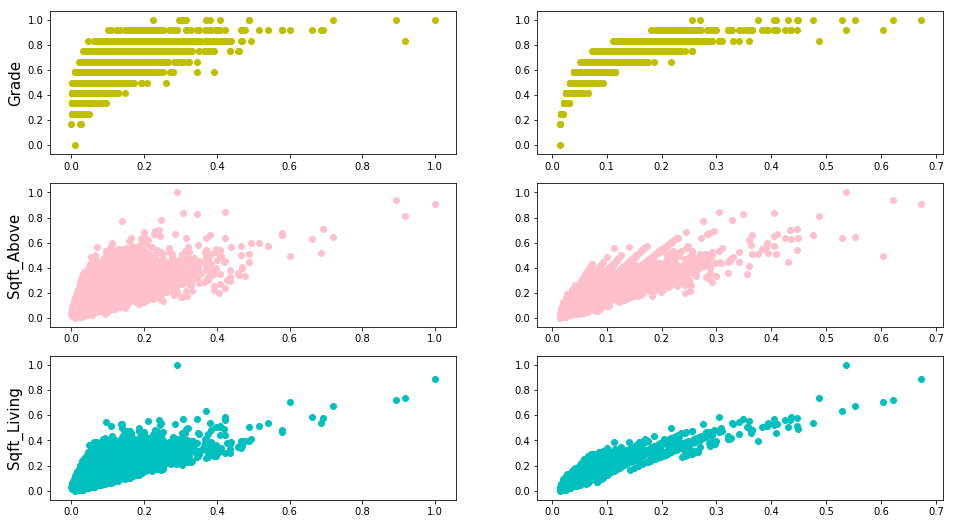

In [28]:
plt.subplots(3,2, figsize = (16,9),)

plt.subplot(3,2,5)
plt.scatter(df_norm["price"], df_norm["sqft_living"], c='c')
plt.ylabel('Sqft_Living', fontsize = 15)

plt.subplot(3, 2, 6)
plt.scatter(df_norm["pred"], df_norm["sqft_living"], c= 'c')

plt.subplot(3,2,1)
plt.scatter(df_norm["price"], df_norm["grade"],c= 'y')
plt.ylabel('Grade',fontsize = 15)

plt.subplot(3, 2, 2)
plt.scatter(df_norm["pred"], df_norm["grade"], c='y')

plt.subplot(3,2,3)
plt.scatter(df_norm["price"], df_norm["sqft_above"], c='pink')
plt.ylabel('Sqft_Above', fontsize = 15)

plt.subplot(3, 2, 4)
plt.scatter(df_norm["pred"], df_norm["sqft_above"], c='pink')

plt.show()